In [5]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

In [6]:
new_model = load_model('./models/imageclassifier.h5')
TRAIN_DIR = './data/train/train/'

In [7]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
    
    return image_paths, labels

In [8]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


In [9]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


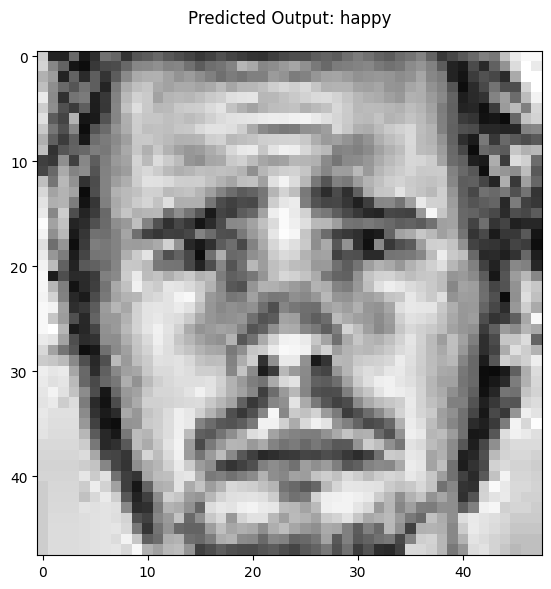

In [16]:
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Crop to focus on the face (adjust coordinates as needed)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        img = img[y:y+h, x:x+w]  # Crop to face region
    
    # Resize to 48x48 pixels
    img = cv2.resize(img, (48, 48))
    
    # Adaptive Histogram Equalization (CLAHE) for better contrast
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    
    return img

# Load and preprocess your image
custom_image_path = './random/sad_02.jpeg'  # Replace with your image path
processed_img = preprocess_image(custom_image_path)

# Make prediction
pred = new_model.predict(processed_img.reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display settings to match your reference
plt.figure(figsize=(6, 6))
plt.imshow(processed_img, cmap='gray', vmin=0, vmax=1)  # Force grayscale range
plt.title(f"Predicted Output: {prediction_label}", fontsize=12, pad=20)
plt.xticks(np.arange(0, 48, 10))  # X-axis ticks (0, 10, 20, 30, 40)
plt.yticks(np.arange(0, 48, 10))  # Y-axis ticks (0, 10, 20, 30, 40)
plt.grid(False)
plt.tight_layout()
plt.show()